In [305]:
from pandas_datareader import data as pdr
from datetime import date, datetime
import yfinance as yf
yf.pdr_override()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [306]:
ticket = "^BVSP"
begin = "2015-01-01"
end = "2024-03-07"

In [307]:
df = pdr.get_data_yahoo(ticket, start=begin, end=end)

c:\Users\mario\anaconda3\envs\Trading\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [308]:
# Definindo medias que serão utilizada na estrategia

periodo = 55
df["Return"] = df["Adj Close"].pct_change()
df["smalow"] = df["Low"].rolling(3).mean()
df["smahigh"] = df["High"].rolling(3).mean()
df["sma"] = df["Adj Close"].rolling(periodo).mean()

df = df.dropna()

In [309]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Return,smalow,smahigh,sma
Date,,,,,,,,,,
2024-02-02,128471.00000,128878.000000,126628.000000,127182.0000,127182.0000,10982800,-0.010110,127079.333333,128972.333333,128763.254545
2024-02-05,127182.00000,127834.000000,126443.000000,127593.0000,127593.0000,9637200,0.003232,126785.000000,128397.666667,128840.800000
2024-02-06,127593.00000,130417.000000,127593.000000,130416.0000,130416.0000,13780300,0.022125,126888.000000,129043.000000,128946.981818
2024-02-07,130412.00000,130552.000000,129518.000000,129608.0000,129608.0000,15425400,-0.006196,127851.333333,129601.000000,129029.636364
2024-02-08,129949.78125,130125.921875,128099.007812,128121.4375,128121.4375,0,-0.011470,128403.335938,130364.973958,129066.480682


<Axes: xlabel='Date'>

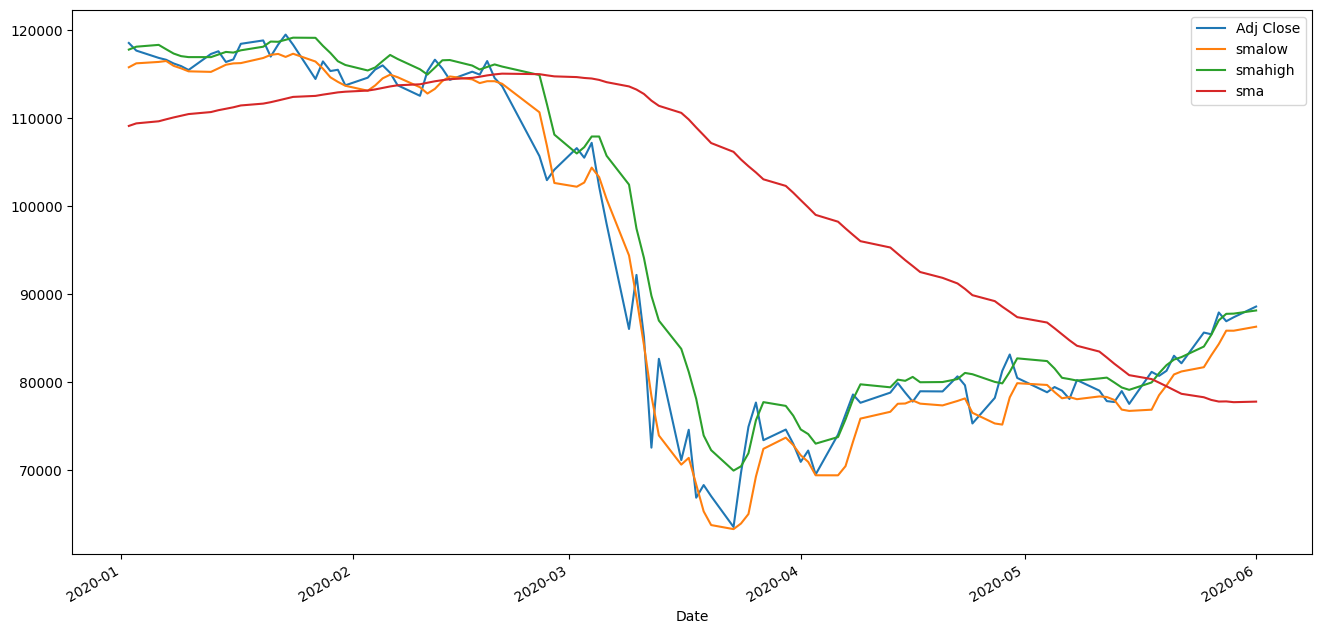

In [310]:
df.loc["2020-01-01":"2020-06-01", ["Adj Close", "smalow", "smahigh", "sma"]].plot(figsize=(16,8))

In [311]:
df.loc[:, 'trade'] = 0
row_interator = df.iterrows()

for date, row in row_interator:
    if (row["Adj Close"] < row["smalow"]) and (row.shift(1)["sma"] > row.shift(2)["sma"]) and row['Adj Close'] > row["sma"]:
        while row["Adj Close"] < row["smahigh"]:
            try:
                date, row = next(row_interator)
                df.loc[date, 'trade'] += row['Return']
            except StopIteration:
                break
        

C:\Users\mario\AppData\Local\Temp\ipykernel_2008\3015562057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'trade'] = 0
C:\Users\mario\AppData\Local\Temp\ipykernel_2008\3015562057.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.009588770264926882' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[date, 'trade'] += row['Return']


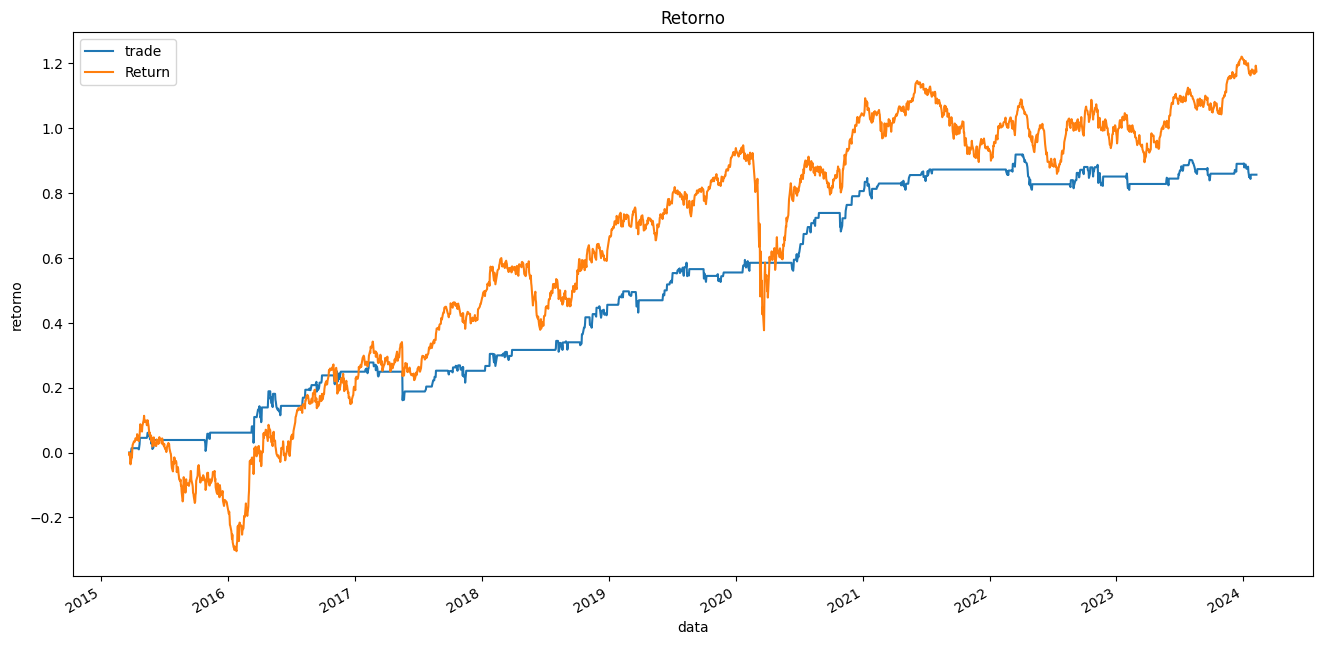

In [312]:
df['trade'].cumsum().plot(figsize=(16,8))
df['Return'].cumsum().plot(figsize=(16,8))
plt.title("Retorno")
plt.xlabel("data")
plt.ylabel("retorno")
plt.legend()
plt.show()